In [ ]:
"""
@Cyrille KESIKU
machine learning scientist
cyrille.kesiku@aims-senegal.org
cyrillekesiku@gmail.com
https://www.linkedin.com/in/cyrille-kesiku-396100196/

"""

In [1]:
import networkx as nx
import pylab as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
# Define the graph with networkx
G = nx.Graph()

In [3]:
# Reading the csv file for edge formation
with open('restaurant.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in readCSV:
        if i != 0 :
            G.add_edges_from([(row[2],row[3]),(row[2],row[4])])
        i+=1

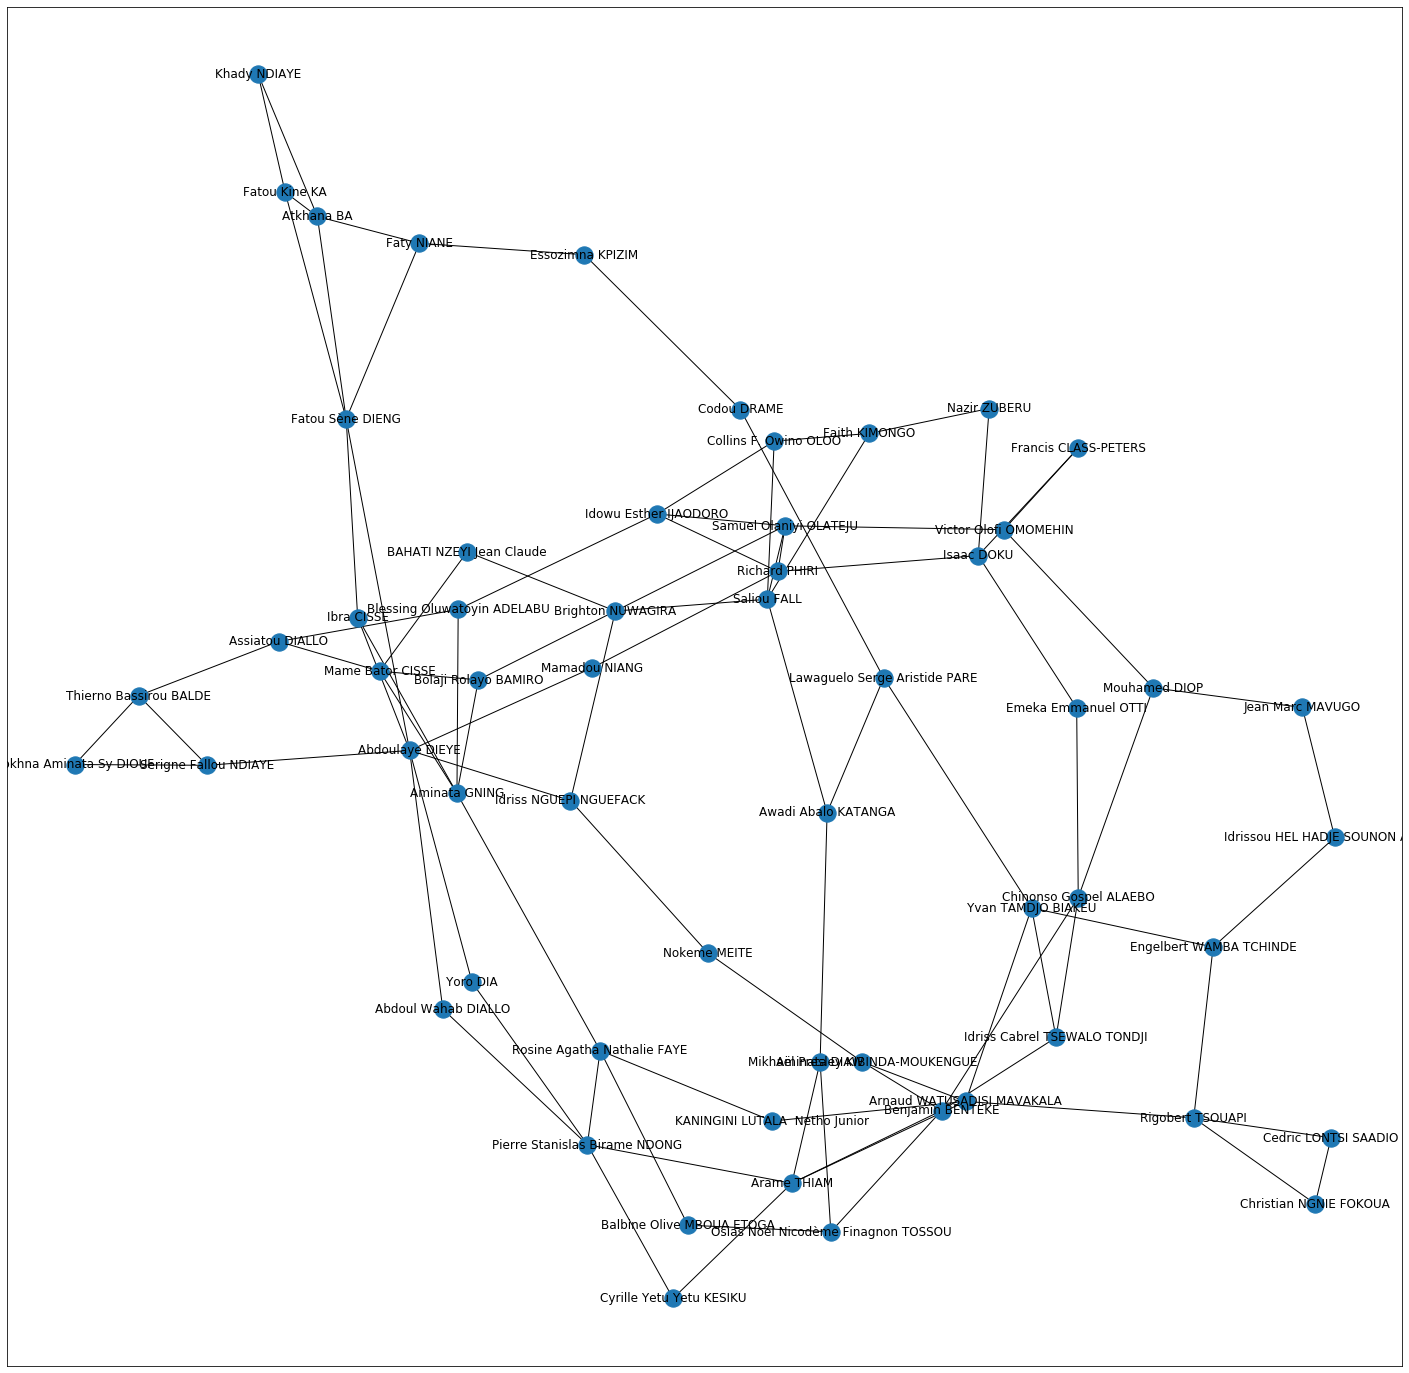

In [4]:
# Display of the graph
figure = plt.figure(figsize = (25, 25))
plt.show(nx.draw_networkx(G,with_labels = True,pos=nx.spring_layout(G)))
figure.savefig("restaurant.png",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300,color='#01BDFE')

## Nombers of  nodes and edges in this network

In [5]:
# nomber of nodes
print ('The nomber of Nodes of this network is: ',len(nx.nodes(G)))
print('---------------------------------------')
print ('The nomber of edges of this network is: ',len(nx.edges(G)))

The nomber of Nodes of this network is:  58
---------------------------------------
The nomber of edges of this network is:  93


## The degree of nodes

In [6]:
degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)
degrees[:10]#the top 10 nodes with high degree,

[('Abdoulaye DIEYE', 7),
 ('Saliou FALL', 5),
 ('Arnaud WATUSADISI MAVAKALA', 5),
 ('Arame THIAM', 5),
 ('Benjamin BENTEKE', 5),
 ('Samuel Olaniyi OLATEJU', 5),
 ('Pierre Stanislas Birame NDONG', 5),
 ('Brighton NUWAGIRA', 5),
 ('Aminata GNING', 5),
 ('Fatou Sène DIENG', 5)]

## Degree Centrality

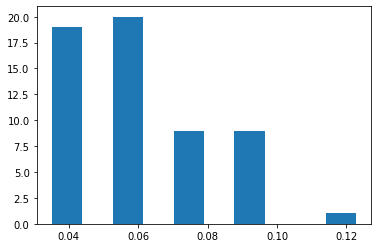

In [7]:
## Degree centrality
deg_cent = nx.degree_centrality(G)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()


## Betweenness centrality

(-1.0974586038599643,
 0.8249111468471083,
 -0.8381750631431506,
 0.9101952532331692)

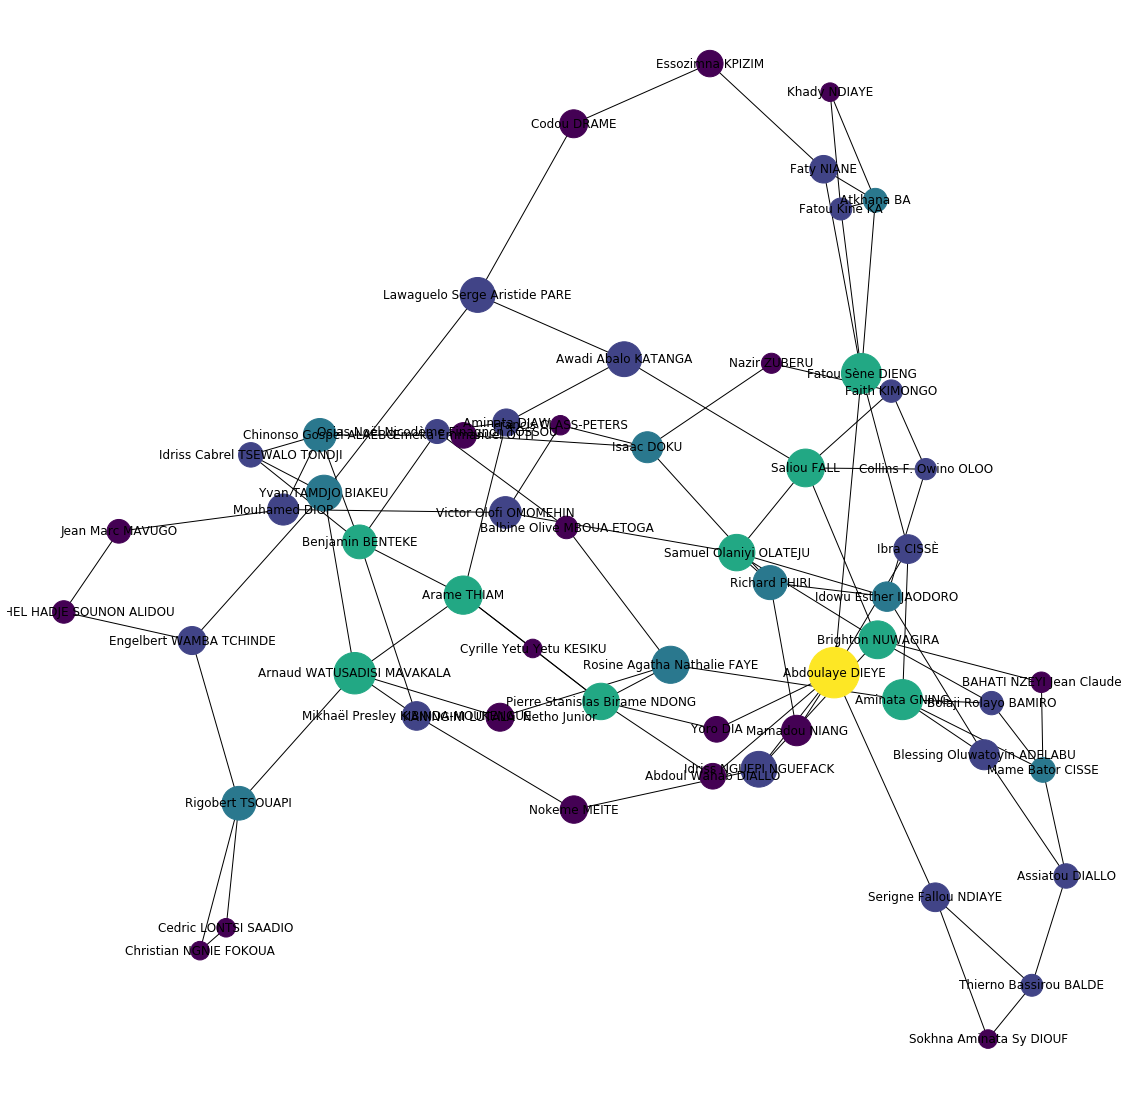

In [8]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

## Community detection

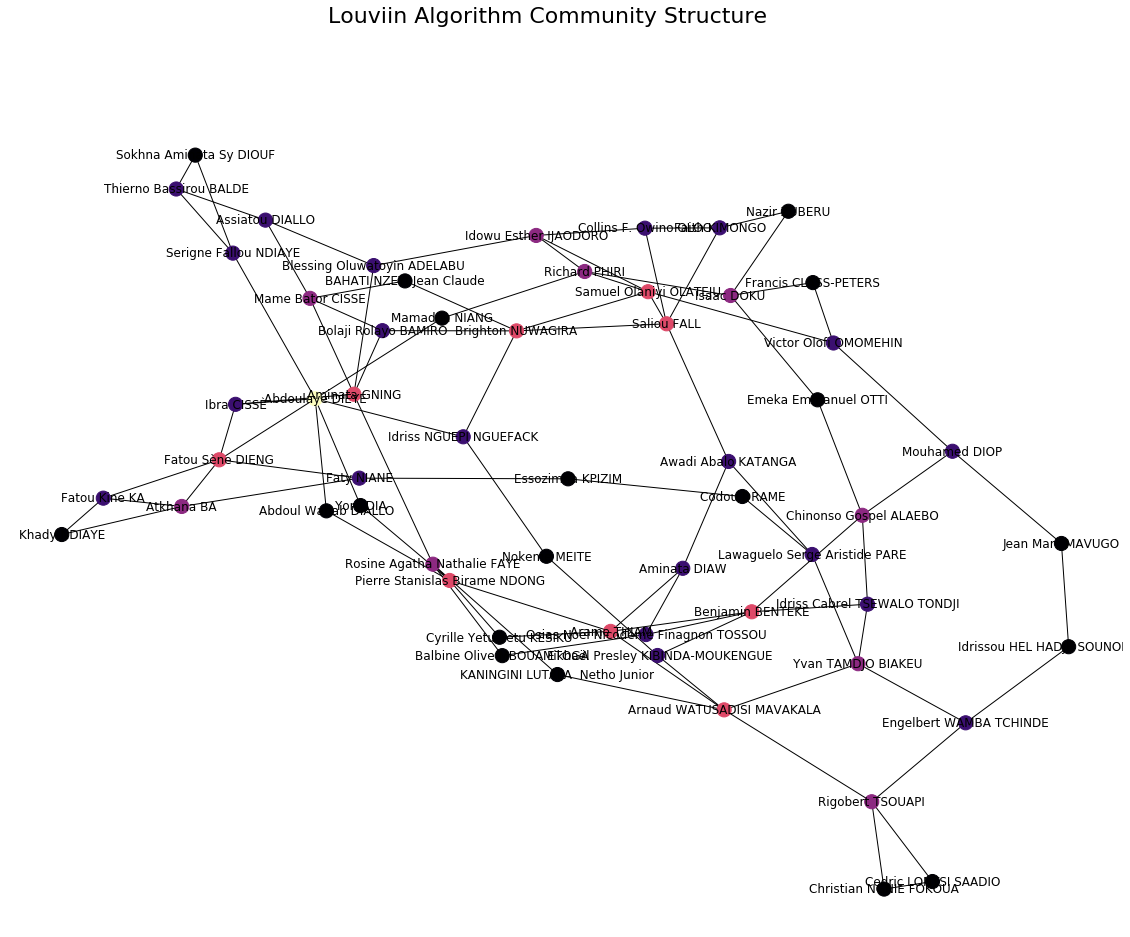

In [29]:
# Now we try to obtain the color coded graph for each community
plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=node_color,node_size=200, with_labels=True)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2.png',dpi=800, bbox_inches='tight')
plt.show()

### C.Computation of , global clustering
In clustering we want to see the transitivity between objects in a network. This is done by observing the number of possible triangles that there are in the network. 

In [20]:
global_clustering = nx.transitivity(G)
print('')
print('')
print('-----------Here is the Global clustering of G1-----------------------------------------------------------')
print('')
print('Global_clustering, or the probability of connectivity of network nodes is ',global_clustering ,'that means', global_clustering*100,'% of probability of connection')



-----------Here is the Global clustering of G1-----------------------------------------------------------

Global_clustering, or the probability of connectivity of network nodes is  0.14754098360655737 that means 14.754098360655737 % of probability of connection


## Hierarchical Clustering

In [28]:
node_degree=pd.DataFrame(nx.degree(G))
data = node_degree.iloc[:, 1:2].values

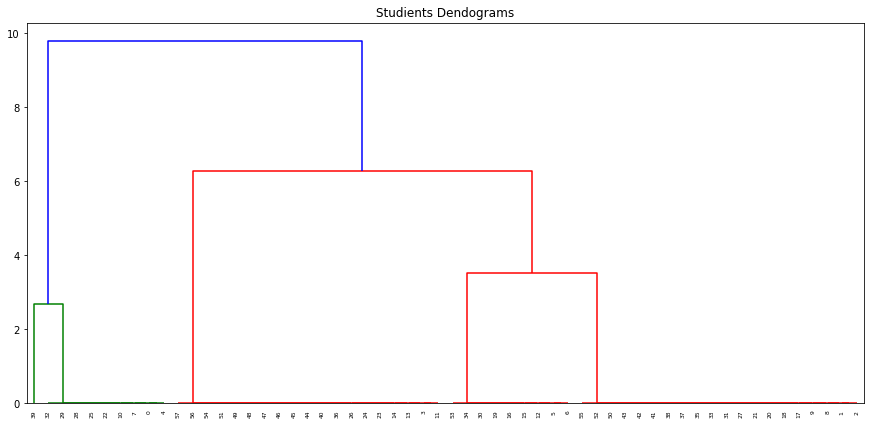

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))
plt.title("Studients Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))